### Importing the required libraries

In [44]:
# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

# Transformers libraries
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

from my_functions import svd

In [45]:
def n_component(v, percent = 80):
    
    N = v.shape[0]
    U, spectrum, Vt = la.svd(v)
    l_svd = (spectrum ** 2)/(N-1)
    V_svd = U

    values = np.cumsum(l_svd/sum(l_svd)*100)

    diff = np.abs(values - percent)

    return np.argmin(diff)

In [46]:
module_name = ["FirstNormalization", "QKV_representation", "AttentionHeads", "AttentionProj", "SecondNormalization", "FirstLayerNN", "SecondLayerNN"]

components_75 = []
components_80 = []
components_85 = []
components_90 = []
components_95 = []

for i in range(1,13):
    for mn in module_name:
        v = torch.load("output/decoder/decoder_" + str(i) + "/" + mn + ".pt").detach().numpy()[0,]
        components_75.append(n_component(v, percent = 75))
        components_80.append(n_component(v, percent = 80))
        components_85.append(n_component(v, percent = 85))
        components_90.append(n_component(v, percent = 90))
        components_95.append(n_component(v, percent = 95))

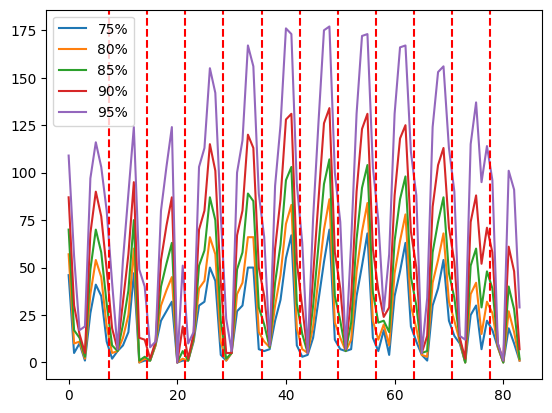

In [47]:
plt.plot(components_75, label = "75%")
plt.plot(components_80, label = "80%")
plt.plot(components_85, label = "85%")
plt.plot(components_90, label = "90%")
plt.plot(components_95, label = "95%")

for i in np.arange(7.5, 84.5, 7):
    plt.axvline(x=i, color='r', linestyle='--')
    
plt.legend()
plt.show()

Let's look at the evolution of the dimensionality of the space for just the passages Attention+Residual and FFNN+Residual

In [48]:
module_name = ["AttentionPlusResidual", "Decoder_Final_Output"]

components_75 = []
components_80 = []
components_85 = []
components_90 = []
components_95 = []

for i in range(1,13):
    for mn in module_name:
        v = torch.load("output/decoder/decoder_" + str(i) + "/" + mn + ".pt")[0][0].detach().numpy()
        print(mn, v.shape)
        components_75.append(n_component(v, percent = 75))
        components_80.append(n_component(v, percent = 80))
        components_85.append(n_component(v, percent = 85))
        components_90.append(n_component(v, percent = 90))
        components_95.append(n_component(v, percent = 95))
components_75

AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)
AttentionPlusResidual (308, 768)
Decoder_Final_Output (308, 768)


[1, 5, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]

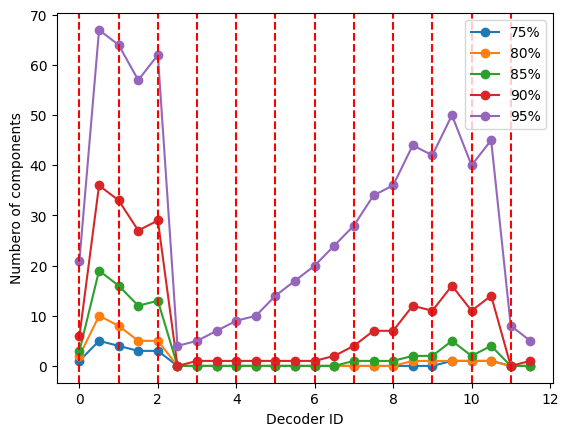

In [55]:
x_plot = np.arange(0, 12, 0.5)

plt.plot(x_plot, components_75, label = "75%", marker="o")
plt.plot(x_plot, components_80, label = "80%", marker="o")
plt.plot(x_plot, components_85, label = "85%", marker="o")
plt.plot(x_plot, components_90, label = "90%", marker="o")
plt.plot(x_plot, components_95, label = "95%", marker="o")

for i in np.arange(0, 12, 1):
    plt.axvline(x=i, color='r', linestyle='--')

plt.xlabel("Decoder ID")
plt.ylabel("Numbero of components")
plt.legend()
plt.show()